In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Regression avec Sklearn

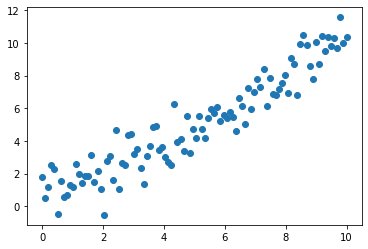

In [2]:
np.random.seed(0)
m = 100 # nombres d'exemples
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)
plt.scatter(X,y)

In [3]:
from sklearn.linear_model import LinearRegression

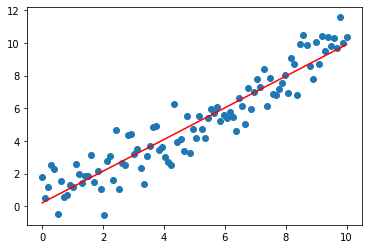

In [4]:
model = LinearRegression()
# on ne precise rien entre parenthese car Linear_Regression utilise la methode des moindres carree qui ne presente pas d'hyperparametres
model.fit(X,y)
model.score(X,y) # coefficient de determination qui est calcule
y_pred = model.predict(X)

plt.scatter(X,y)
plt.plot(X, y_pred, c='r')

C:\Users\Armand Forent\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


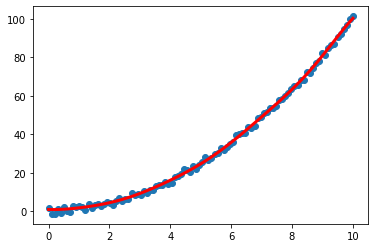

In [5]:
y = X**2 + np.random.randn(m,1)
from sklearn.svm import SVR
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)

y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

## 2) Classification: Survivants du Titanic

In [6]:
import pandas as pd 
import seaborn as sns

In [7]:
titanic = pd.read_excel('titanic3.xls')
print(titanic.shape)
titanic.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
# Filtrons un peu le dataset
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


In [9]:
# On va developper un model pour savoir si un passager pouvait survivre au naufrage du titanic
from sklearn.neighbors import KNeighborsClassifier

In [10]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [11]:
model = KNeighborsClassifier(n_neighbors = 5) # n_neighbors = 0 - 10
model.fit(X,y)
model.score(X,y)

0.8279158699808795

In [12]:
model.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
def survie(model, pclass=3, sex=0, age=26):
    X = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(X))

In [14]:
survie(model)

[0]


1


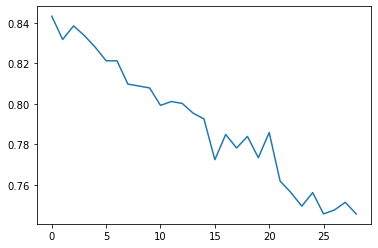

In [15]:

score = []
best_k = 1
best_score=0

for k in range(best_k,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score.append(model.score(X, y))

    if best_score < model.score(X,y):
        best_k = k
        best_score = model.score(X,y)

print(best_k)
plt.plot(score)